In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.ticker as mtick

In [2]:
print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.24.3
pandas version :  2.0.3
seaborn version :  0.12.2


In [3]:
df = pd.read_csv('Travel.csv')

# Data Pre-Processing

In [41]:
# Membuang colom yang tidak digunakan
df_prep = df.copy()
df_prep = df_prep.drop(columns='CustomerID')

## Handling Missing Values

In [5]:
df_prep['Age'].fillna(df_prep['Age'].mean(), inplace=True)
df_prep['TypeofContact'].fillna('Unknown', inplace=True)
df_prep['DurationOfPitch'].fillna(df_prep['DurationOfPitch'].median(), inplace=True)
df_prep['NumberOfFollowups'].fillna(df_prep['NumberOfFollowups'].median(), inplace=True)
df_prep['PreferredPropertyStar'].fillna(df_prep['PreferredPropertyStar'].median(), inplace=True)
df_prep['NumberOfTrips'].fillna(df_prep['NumberOfTrips'].median(), inplace=True)
df_prep['NumberOfChildrenVisiting'].fillna(df_prep['NumberOfChildrenVisiting'].median(), inplace=True)
df_prep['MonthlyIncome'].fillna(df_prep['MonthlyIncome'].median(), inplace=True)

In [6]:
df_prep.isna().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [7]:
df_prep.describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,4888.0,0.188216,0.390925,0.0,0.0,0.0,0.00,1.0
Age,4888.0,37.622265,9.098418,18.0,31.0,37.0,43.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.0,1.0,3.00,3.0
DurationOfPitch,4888.0,15.362930,8.316166,5.0,9.0,13.0,19.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.0,3.0,3.00,5.0
NumberOfFollowups,4888.0,3.711129,0.998271,1.0,3.0,4.0,4.00,6.0
PreferredPropertyStar,4888.0,3.577946,0.797005,3.0,3.0,3.0,4.00,5.0
NumberOfTrips,4888.0,3.229746,1.822769,1.0,2.0,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.0,0.0,1.00,1.0
PitchSatisfactionScore,4888.0,3.078151,1.365792,1.0,2.0,3.0,4.00,5.0


## Handling Duplicates values

In [8]:
print('There is',df.duplicated().sum(),'duplicated value')

There is 0 duplicated value


## Handling Inconsistent Categorical Values

In [9]:
pd.set_option('display.max_rows', 5000)
for i in df.columns:
    if i not in 'CustomerID':
        print(f'''Value count kolom {i}:''')
        print(df[i].value_counts())
        print()
    

Value count kolom ProdTaken:
ProdTaken
0    3968
1     920
Name: count, dtype: int64

Value count kolom Age:
Age
35.0    237
36.0    231
34.0    211
31.0    203
30.0    199
32.0    197
33.0    189
37.0    185
29.0    178
38.0    176
41.0    155
39.0    150
28.0    147
40.0    146
42.0    142
27.0    138
43.0    130
46.0    121
45.0    116
26.0    106
44.0    105
51.0     90
47.0     88
50.0     86
25.0     74
52.0     68
53.0     66
48.0     65
49.0     65
55.0     64
54.0     61
56.0     58
24.0     56
22.0     46
23.0     46
59.0     44
21.0     41
20.0     38
19.0     32
58.0     31
57.0     29
60.0     29
18.0     14
61.0      9
Name: count, dtype: int64

Value count kolom TypeofContact:
TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

Value count kolom CityTier:
CityTier
1    3190
3    1500
2     198
Name: count, dtype: int64

Value count kolom DurationOfPitch:
DurationOfPitch
9.0      483
7.0      342
8.0      333
6.0      307
16.0     274


Diketahui bahwa ada ketidakkonsistenan pada feature gerder(Fe Male), dan maritalstatus(Singe dengan unmaried yang memiliki definisi sama)

In [10]:
df_prep['Gender'] = df_prep['Gender'].replace('Fe Male', 'Female')
df_prep['MaritalStatus'] = df_prep['MaritalStatus'].replace('Single', 'Unmarried')

In [11]:
handled = ['Gender', 'MaritalStatus']
for i in handled:
    print(f'''Value count kolom {i}:''')
    print(df_prep[i].value_counts())
    print()

Value count kolom Gender:
Gender
Male      2916
Female    1972
Name: count, dtype: int64

Value count kolom MaritalStatus:
MaritalStatus
Married      2340
Unmarried    1598
Divorced      950
Name: count, dtype: int64



### Handling outliers

In [12]:
from scipy import stats

In [13]:
df_prep_before = df

In [14]:
features = ['DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']

for f in features:
    Q1 = df_prep[f].quantile(0.25)
    Q3 = df_prep[f].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (1.5 * IQR)
    high_limit = Q3 + (1.5 * IQR)
    filtered_entries = ((df_prep[f] >= low_limit) & (df_prep[f] <= high_limit))
    df_prep = df_prep[filtered_entries]


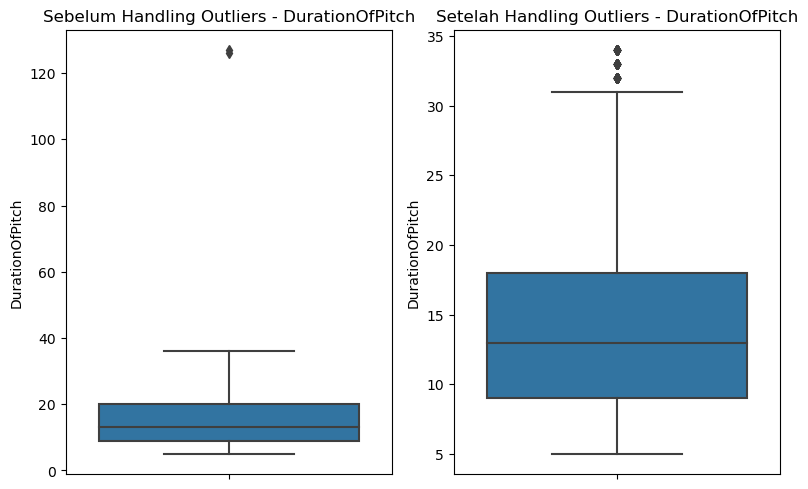

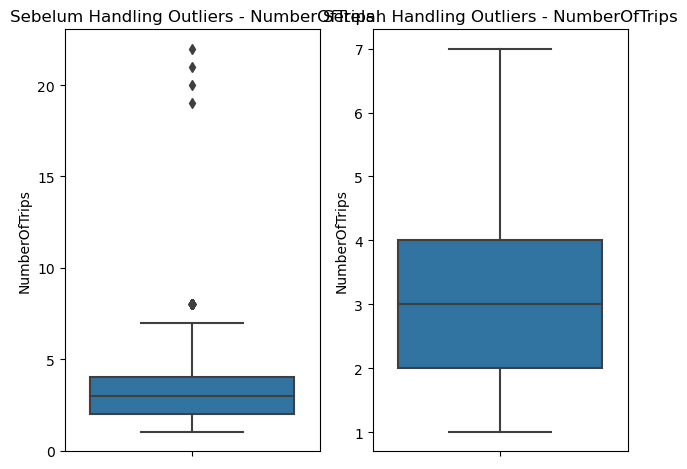

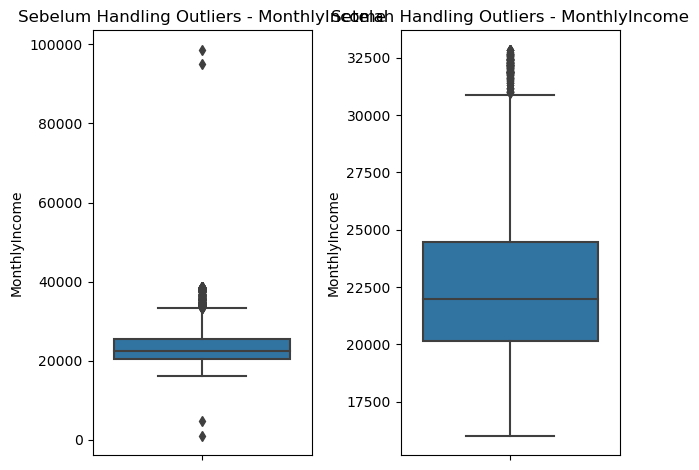

In [15]:
plt.figure(figsize=(8, 5))
for col in features:
    # Boxplot sebelum penanganan outliers
    plt.subplot(1, 2, 1)
    sns.boxplot(y=df_prep_before[col])
    plt.title(f'Sebelum Handling Outliers - {col}')

    # Boxplot setelah penanganan outliers
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_prep[col])
    plt.title(f'Setelah Handling Outliers - {col}')

    plt.tight_layout()
    plt.show()

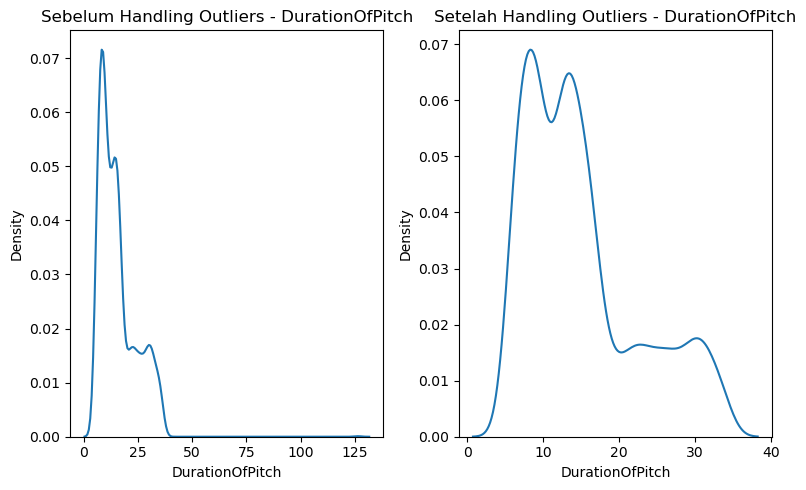

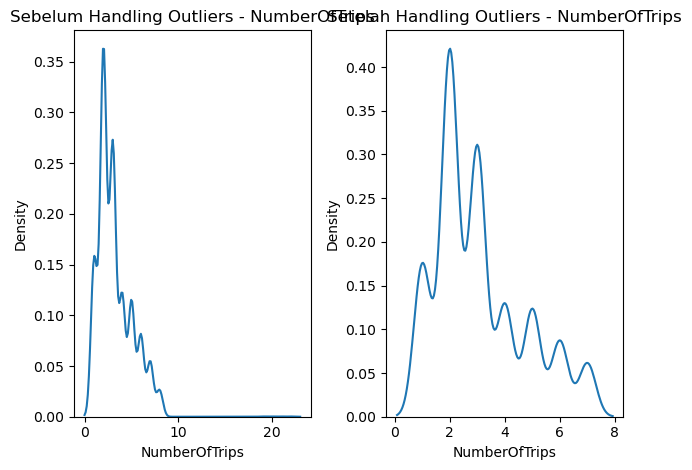

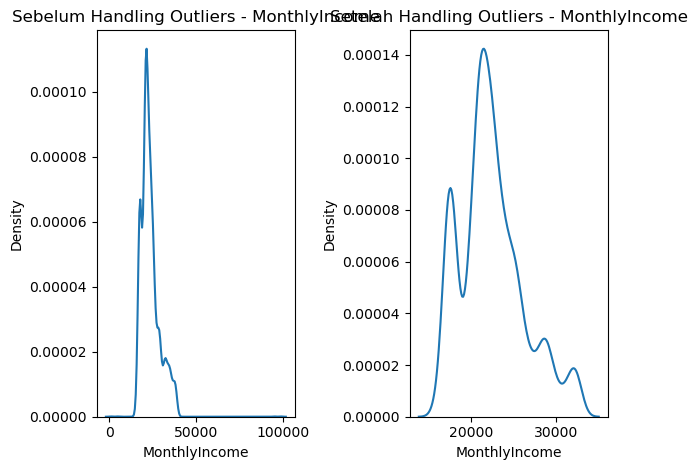

In [16]:
plt.figure(figsize=(8, 5))
for col in features:
    # Boxplot sebelum penanganan outliers
    plt.subplot(1, 2, 1)
    sns.kdeplot(data=df_prep_before[col])
    plt.title(f'Sebelum Handling Outliers - {col}')

    # Boxplot setelah penanganan outliers
    plt.subplot(1, 2, 2)
    sns.kdeplot(data=df_prep[col])
    plt.title(f'Setelah Handling Outliers - {col}')

    plt.tight_layout()
    plt.show()

## Feature Engineering

## Feature Selection

In [42]:
def correlation(dataset, threshold):
    col_corr = set()  #
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [ ]:
df_prep.select_dtypes

In [44]:
corr_features = correlation(df_prep.select_dtypes(exclude=object).drop(columns='ProdTaken'), 0.7)

In [45]:
corr_features

set()

Diketahui dari percobaan code diatas bahwa semua feature dapat digunakan dikarenakan tidak ada yang redundant jika menggunakan threshold 0.7

### Feature Extraction

Melakukan segmentasi pada feature Age dan Income

In [17]:
def segment(x):
    if x['Age'] <= 21:
        segment = 'Teen'
    elif (x['Age'] >= 21 and x['Age'] <= 55):
        segment = 'Adult'
    else:
        segment = 'Elderly'
    return segment

In [18]:
df_prep['segmentasi_umur'] = df_prep.apply(lambda x: segment(x), axis=1)
df_prep.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,segmentasi_umur
0,1,41.000000,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0,Adult
1,0,49.000000,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0,Adult
2,1,37.000000,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0,Adult
3,0,33.000000,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0,Adult
4,0,37.622265,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0,Adult


In [19]:
def segmentasi_income(a):
        if a['MonthlyIncome'] <= 1045:
            segmentasi = 'Low Income'
        elif 1046 <= a['MonthlyIncome'] <= 1275:
            segmentasi = 'Middle Income'
        else:
            segmentasi = 'High Income'
        return segmentasi

In [20]:
df_prep['segmentasi_income'] = df_prep.apply(lambda x: segmentasi_income(x), axis=1)
df_prep.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,...,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,segmentasi_umur,segmentasi_income
0,1,41.000000,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,...,Unmarried,1.0,1,2,1,0.0,Manager,20993.0,Adult,High Income
1,0,49.000000,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,...,Divorced,2.0,0,3,1,2.0,Manager,20130.0,Adult,High Income
2,1,37.000000,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,...,Unmarried,7.0,1,3,0,0.0,Executive,17090.0,Adult,High Income
3,0,33.000000,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,...,Divorced,2.0,1,5,1,1.0,Executive,17909.0,Adult,High Income
4,0,37.622265,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,...,Divorced,1.0,0,5,1,0.0,Executive,18468.0,Adult,High Income


### Feature Encoding

In [21]:
# Label Encoding
df_prep['segmentasi_umur'] = df_prep['segmentasi_umur'].map({'Teen':0,
                                                            'Adult':1,
                                                            'Elderly':2})
df_prep['segmentasi_income'] =  df_prep['segmentasi_income'].map({'Low Income':0,
                                                          'Middle Income':1,
                                                          'High Income':2})

In [22]:
from sklearn.preprocessing import OneHotEncoder

In [23]:
#One hot encoding
encoder = OneHotEncoder(sparse=False)
for cat in ['TypeofContact', 'Occupation', 'MaritalStatus','Designation','Gender','ProductPitched']:
    onehots = pd.DataFrame(encoder.fit_transform(df[[cat]]), columns=encoder.get_feature_names_out([cat]))
    df_prep = df_prep.join(onehots)

e:\Anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
e:\Anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
e:\Anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
e:\Anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `spa

In [24]:
df_prep.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,...,Designation_Senior Manager,Designation_VP,Gender_Fe Male,Gender_Female,Gender_Male,ProductPitched_Basic,ProductPitched_Deluxe,ProductPitched_King,ProductPitched_Standard,ProductPitched_Super Deluxe
0,1,41.000000,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0,49.000000,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,1,37.000000,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,0,33.000000,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,37.622265,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


### Feature Transformation

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
outlier_cols = ['DurationOfPitch', 'Age', 'MonthlyIncome']
scaler = MinMaxScaler()

df_prep[outlier_cols] = scaler.fit_transform(df_prep[outlier_cols])

### Split Data into training and testing

In [27]:
X = df_prep.select_dtypes(exclude=object).drop(columns='ProdTaken') # menggunakan semua feature kecuali target
y = df_prep['ProdTaken']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42) #Splitting 

In [29]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3017, 38) (1293, 38) (3017,) (1293,)


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

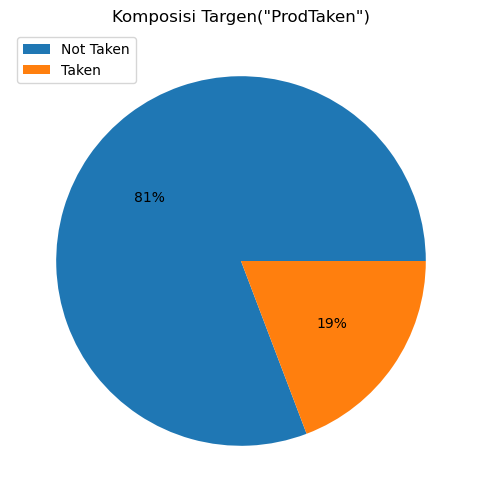

In [31]:
plt.figure(figsize=(6, 6))
plt.pie(y_train.value_counts(), autopct='%1.0f%%')
plt.title('Komposisi Targen("ProdTaken")')
plt.legend(labels=['Not Taken', 'Taken'], loc='upper left')

plt.show()

Karena adanya imbalace pada target di data training make perlu dilakukan handling imbalance class

### Handling Imbalanced Class Dataset

In [32]:
from imblearn.over_sampling import SMOTE

In [33]:
sm = SMOTE(random_state = 42, sampling_strategy = 1.0)
X_train, y_train= sm.fit_resample(X_train, y_train)

In [34]:
y_train.value_counts()

ProdTaken
1    2437
0    2437
Name: count, dtype: int64